In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_train=pd.read_csv("bank-additional-full.csv")
data_train1=data_train.dropna()

In [8]:
data_train1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#data_train._get_numeric_data()  get numrical data

In [10]:
all_col=data_train._get_numeric_data().columns

In [11]:
gf=list(set(data_train)-set(all_col))
for ix in gf:
    data_train1[ix]=data_train1[ix].astype("category").cat.codes   ## convert data into numrical

In [12]:
y_level=data_train1["y"]

In [13]:
data_train1=data_train1.values

In [39]:
np.savetxt("bank_data.txt",data_train1,delimiter=",")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_train1[:,:20],y_level, test_size=0.2)

In [16]:
from sklearn.preprocessing import MinMaxScaler  ##  normlization of data 
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data_train1[:,:20])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


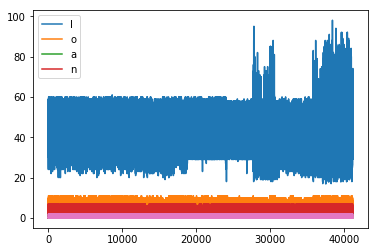

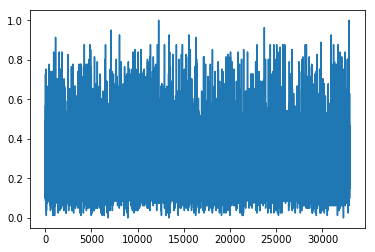

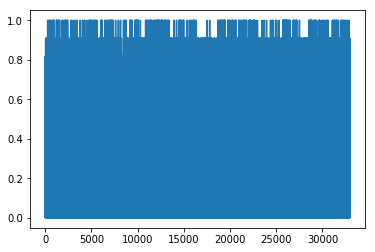

In [27]:
Col=data_train.columns    ##original data visulasation
import matplotlib.pyplot as plt
for ix in range(7):
    plt.plot(data_train1[:,ix])
    plt.legend(Col[ix])
plt.show()

for ix in range(2):
    plt.plot(X_train[:,ix])
    plt.show()




In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
svclassifier=SVC(kernel='linear',class_weight='balanced')
svclassifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
svclassifier.score(X_train,y_train)

0.84291350531107734

In [30]:
svclassifier.score(X_test,y_test)

0.84013109978150036

In [31]:
yprd=svclassifier.predict(X_test)
print classification_report(yprd,y_test)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      6197
           1       0.89      0.41      0.56      2041

   micro avg       0.84      0.84      0.84      8238
   macro avg       0.86      0.69      0.73      8238
weighted avg       0.85      0.84      0.82      8238



In [43]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(2,weights="uniform")
nn.fit(X_train,y_train)
print nn.score(X_test,y_test)
y_prd=nn.predict(X_test)
print classification_report(y_prd,y_test)

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


0.890992959456


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7950
           1       0.17      0.56      0.26       288

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.58      0.73      0.60      8238
weighted avg       0.95      0.89      0.92      8238



In [35]:
sport_vector=svclassifier.support_vectors_
s=svclassifier.predict(sport_vector)

In [36]:
np.savetxt("sport_vector.txt",sport_vector,delimiter=",")
np.savetxt("lavel_of_sv.txt",s,delimiter=",")